<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2022/blob/main/HW3_KNNAndLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

In this homework assignment, we will further explore the **k-nearest-neighbor (kNN)** model for classification and the **linear regression** model for regression tasks.

Please submit your solutions as a PDF file to Blackboard by **Wednesday, March 16th at 11:59 PM**.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## Part 1: kNN Method
Evaluate the kNN method with $k=1, 5, 25$  on the dataset used in Week 3 notebook.

In [10]:
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"
data = pd.read_csv(url)
model_svm = LinearRegression()
input_col = ['x1', 'x2']
data.head()

,x1,x2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


1. Split the data into 80% training data and 20% test data.

In [6]:
training_data, test_data = train_test_split(data, test_size=0.2)
test_data

,x1,x2,y
164,-0.570430,1.090314,1
184,-0.264757,1.491832,1
15,1.279560,-0.271033,0
157,-0.487293,0.979110,1
57,-0.077114,0.505122,0
153,2.887947,0.020693,1
70,1.053189,-0.903566,0
83,1.816825,-1.161743,0
198,0.008131,2.242264,1
125,1.623802,0.240937,1


2. Train a kNN model with $k=1$ on the training data, and calculate its prediction accuracy on the test data.

In [14]:
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(data[['x1', 'x2']], data['y'])
data['prediction'] = model_1nn.predict(data[input_col])
accuracy_score(data['y'], data['prediction'])

1.0

3. Train a kNN model with $k=5$ on the training data, and calculate its prediction accuracy on the test data.

In [15]:
model_5nn = KNeighborsClassifier(n_neighbors=5)
model_5nn.fit(data[['x1', 'x2']], data['y'])
data['prediction_5'] = model_5nn.predict(data[input_col])
accuracy_score(data['y'], data['prediction_5'])

0.87

4. Train a kNN model with $k=50$ on the training data, and calculate its prediction accuracy on the test data.

In [16]:
model_50nn = KNeighborsClassifier(n_neighbors=50)
model_50nn.fit(data[['x1', 'x2']], data['y'])
data['prediction_50'] = model_50nn.predict(data[input_col])
accuracy_score(data['y'], data['prediction_50'])

0.81

5. Which k value give the best accuracy score? Can you explain why?

Answer: 1 gave the best K value because it is just assigned to the class of the nearest neighbor.

## Part 2: Linear Regression

Train a linear regression model using the normal equation and verify that the results coincide with the results from `sklearn`.

We will use the advertisement revenue data used in Week 5 and build a linear regression model on `radio` and `sales`.

In [17]:
url = "https://www.statlearning.com/s/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


1. Split the data into 85% training data and 15% test data.

In [18]:
train, test = train_test_split(advertising, test_size=0.15)

2. Build a linear regression model that predicts `sales` with the `radio` feature using `sklearn`. Display the model parameters and its test MSE.

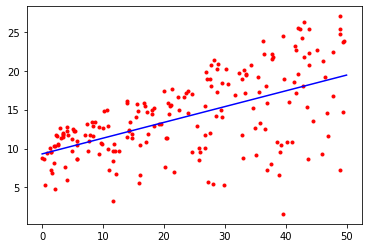

In [28]:
model = LinearRegression()
model.fit(advertising[['radio']], advertising[['sales']])
m = model.coef_[0, 0]
b = model.intercept_[0]
plt.plot(advertising.radio, advertising.sales, 'r.')
x_coord = np.array([0, 50])
y_coord = x_coord * m + b
plt.plot(x_coord, y_coord, 'b-')

In [44]:
# MSE
beta0 = m
beta1 = b
y_pred = beta0 + beta1 * advertising.radio
mean_squared_error(advertising.sales, y_pred)

59347.20869593942

3. Calculate the parameter values with the normal equation. These values should be the same as the values shown in Step 2.

In [35]:
X = np.hstack([np.ones([len(advertising), 1]), advertising[['radio']].values])
y = advertising[['sales']].values
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
beta

array([[9.3116381 ],
       [0.20249578]])

In [41]:
def get_squared_error(beta0, beta1, data, i):
    xi = data.loc[i, 'radio']
    yi = data.loc[i, 'sales']
    f_xi = beta0 + beta1 * xi
    return (yi - f_xi) ** 2

def get_MSE(beta0, beta1, data):
    list_errors = [get_squared_error(beta0, beta1, data, ind) for ind in data.index]
    return sum(list_errors) / len(list_errors)

get_MSE(beta[0], beta[1], advertising)

array([18.09239775])

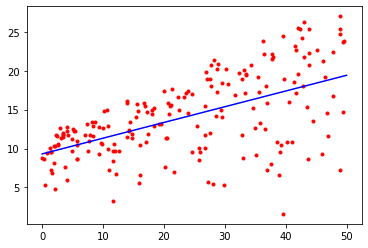

In [37]:
plt.plot(advertising['radio'], advertising['sales'], 'r.')
x_coordinates = np.array([0,50])
y_coordinates = x_coordinates * 0.202 + 9.311
plt.plot(x_coordinates, y_coordinates, 'b-')